# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Sophie Hodgson
#### &#9989; Last Updated on 4/4/24

# ___Analyzing The Accuracy of Fourier Series Approximations for Periodic Functions___

##  Introduction 

_(Provide context for the problem: Background and Motivation.  **Clearly state the question(s) you set
out to answer.**)_

The Fourier Series Transform is useful for approximating periodic functions. This approximation works by fitting period functions to sine or cosine waves which are altered via calculated coefficients and phase shifts. The official definition of the Fourier series decomposition is:

$$f(x) = \Sigma c_n e^{i2\pi \frac{n}{P}x}$$

Where $c_n =  \frac{1}{P} \int_{-P/2}^{P/2} f(x)e^{i2\pi \frac{n}{P}x} dx$ and $x   \epsilon   [-P/2, P/2]$, where P is the period of the function and n is the number of terms you want.

However, a simplified version of this equation will be used, which is as follows:

$$
f(t) = a_0 + \Sigma a_n cos(n\omega_0 t) + b_n sin(n\omega_0 t)
$$

Where $\omega_0 =  \frac{2\pi}{T_0}$, where $T_0$ is the period of the function. $a_0$ represents the offset if the function isn't centered around zero. The coefficients $a_n$, $b_n$, and $a_0$ are given by:

$
a_n = \frac{2}{T_0} \int_{-T_0/2}^{T_0/2} f(t) cos(n\omega_0t)
$

$
b_n = \frac{2}{T_0} \int_{-T_0/2}^{T_0/2} f(t) sin(n\omega_0t)
$

$
a_0 = \frac{1}{T_0} \int_{0}^{T_0} f(t) dt
$

Where f(t) is the periodic function itself. These versions are much easier to code, and are equivalent to the real part of the first versions.

These approximations can come in handy when the function being approximated is complex, as it allows for some simplification, depending on how many terms are used. Another use for the Fourier transform is breaking down complex signals into their composite frequenceies, however that won't be covered in this project.

Throughout this project I aim to assess the accuracy of the Fourier series transform for four different periodic functions: the square function, the triangle function, the sawtooth function, and a custom periodic "challenge" function. Furthermore, both the periodic functions themselves and their most accurate Fourier series will be inputted into a damped, driven oscillator to see how the motion of the oscillator differs between the two.

The questions I aim to answer are as follows:
1. What is the minimum number of terms needed in a Fourier series to have a 99% accuracy?
2. How does the accuracy of the series differ between the different periodic functions?
3. How does the motion of a damped, driven oscillator differ between the actual periodic function and its Fourier series?

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

I will begin with a simple square periodic function. This can be loaded in using the scipy package. First, I begin by making an array of timesteps that will be used to calculate the periodic function and it's corresponding fourier series. I use the natural frequency of 2$\pi$ for the input of the square function. This value is used AS the period of the square function is 1. A plot of the square periodic function is shown below.

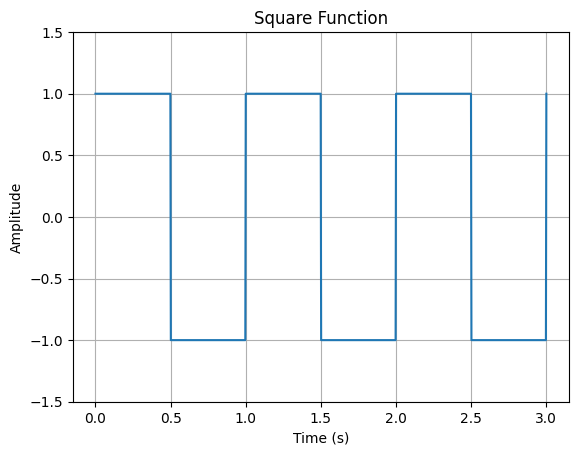

In [5]:
#any constants here
pi = np.pi
T = 1
w_0 = (2*pi)/T

#creating time series and the square periodic function
t = np.linspace(0,3, 1000)
square = sig.square(w_0*t)

#plotting the square function
plt.plot(t, square, label='Square')
plt.ylim(-1.5,1.5)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Square Function');

Now I can begin the fourier series approximation. The first step is to calculate the coeeficients $a_0$, $a_n$, and $b_n$. In order to solve this problem by hand instead of using a numerical integrator, the square function must be translated into a piecewise function. This function can be approximated as:

$$
f(x) =
\begin{cases}
    1 & \text{for } 0 < t < \frac{T_0}{2} \\
    -1 & \text{for } \frac{T_0}{2} < t < T_0 \\
\end{cases}
$$

From here we can calulate each of the coefficients by splitting the integrals across the piecewise function. The resulting coefficients are as follows:

$a_0 = 0$

$a_n = 0 $ as $sin(n\pi)$ goes to zero for whole integer values of n.

$b_n = \frac{2}{n\pi} (1-cos(n\pi)) $

Now that we have our coefficients, I can build the fourier series approximation. The approximation will depend on how many terms I want to include. For exploration purposes, I will start with five terms, and then assess the accuracy to see if more terms are needed. 

I'll begin by creating functions that calculate the coefficient for each term, and then calculate each term. Then I'll use that in a for loop to calculate each term in the fourier series. 

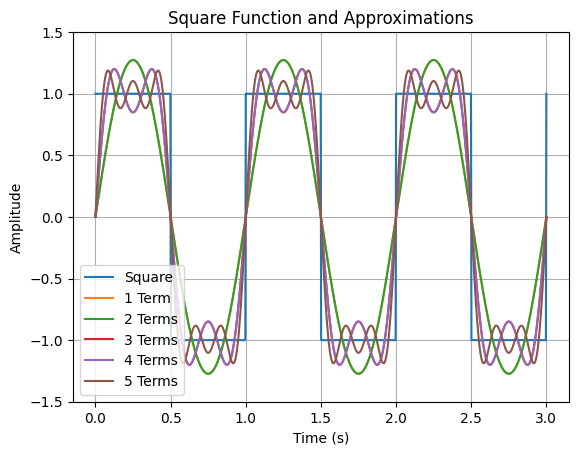

In [6]:
#define functions for the coefficients and calculating each term
def coefficients(n):
    '''Take in the term number n, return the bn coefficient for this term'''
    return (2/(n*pi))*(1-np.cos(n*pi))

def n_term(n, t):
    '''Take in the term number and the time array, return the correct term for the fourier series, which 
    has been evaluated for the time array'''
    return coefficients(n) * np.sin(n* w_0 * t)

#calculate up to term 5
n_list = np.arange(1,6,1)
a_0 = 0
storage = []
for i in range(len(n_list)):
    term = n_term(n_list[i], t)
    storage.append(term)

#add all the terms together to get the series instead of each term individually
for i in range(5):
    if i ==0:
        storage[i] = a_0 + storage[i]
    else:
        storage[i] = storage[i-1] + storage[i]      

#plotting the square function and the approximations
plt.plot(t, square, label='Square')
plt.plot(t, storage[0], label = '1 Term')
plt.plot(t, storage[1], label = '2 Terms')
plt.plot(t, storage[2], label = '3 Terms')
plt.plot(t, storage[3], label = '4 Terms')
plt.plot(t, storage[4], label = '5 Terms')
plt.ylim(-1.5,1.5)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Square Function and Approximations')
plt.legend();

To start off the accuracy assessment, I create a function for assessing the accuracy of a dataset against a reference set. To do this I use a simple distance formula, where I calculate the distance from each point in the dataset from the corresponding reference point.

In [12]:
def accuracy(ref, actual):
    '''Takes in two arrays, the reference and the actual. This will compare the reference and the actual
    to determine the average percent accuracy of the actual'''
    difference = []
    for i in range(len(ref)):
        difference.append((np.abs((ref[i]-actual[i])/ref[i])))
    percent = np.average(difference) * 100
    return 100 - percent

Now that I have the percent accuracy function written, I can test the accuracy of the fifth term fourier series approximation to see if it's close to 99%. Qualitative analysis suggests that it's not close to being 99% accurate at only five terms, however I'd like a quantitative number to get an idea of how many more terms may be needed.

In [13]:
for term in storage:
    print('Percent accuracy is:', accuracy(square, term), '%')

Percent accuracy is: 65.62683084003214 %
Percent accuracy is: 65.62683084003214 %
Percent accuracy is: 78.10078532784819 %
Percent accuracy is: 78.10078532784819 %
Percent accuracy is: 83.57669657057481 %


As shown above, the fifth term has around 83% accuracy. The next step is to make a function that runs through terms until it reaches 99% accuracy. 

In [25]:
def runtill_99(ref, t):
    '''Takes in the reference function and the time array and runs through terms until a 99% accuracy is reached.
    Returns the evaluated term for 99% accuracy and the term number.'''
    
    target = 99
    accuracy_ = 0
    term_num = 1
    storage = []
    index = 0
    
    while accuracy_ < target:
        term = n_term(term_num, t)
        storage.append(term)
        if index ==0:
            storage[index] = storage[index] + a_0
        else:
            storage[index] = storage[index] + storage[index-1]
        
        accuracy_ = accuracy(square, storage[index])
        
        term_num+=1
        index+=1
        
    return storage[-1], len(storage)

99% accurate with 227 terms.


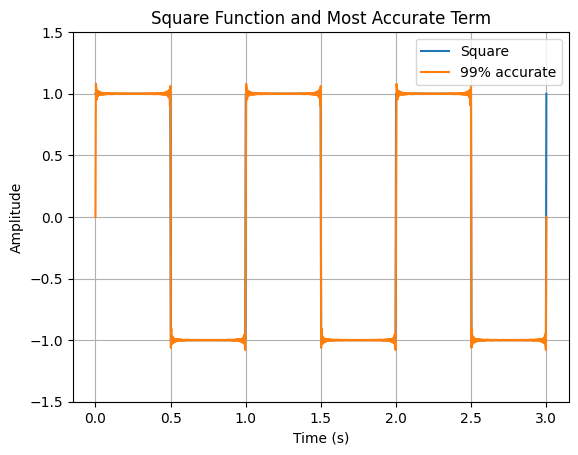

In [26]:
last_term, term_number = runtill_99(square, t)
print('99% accurate with', term_number, 'terms.')

#plotting the square function
plt.plot(t, square, label='Square')
plt.plot(t, last_term, label='99% accurate')
plt.ylim(-1.5,1.5)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Square Function and Most Accurate Term')
plt.legend();

As you can see from the above graph and print statement, 99% accuracy is achieveable, but with a very large number of terms. For the square function it takes 227 terms to achieve 99% accuracy.

Now I switch to analyzing the 

## Results and Discussion

_(What did you find when you carried out your methods? Some of your code related to presenting results/figures/data may be replicated from the methods section or may only be present in
this section.
All of the plots that you plan on using for your presentation should be present in this section)_

##  Conclusion and Perspectives

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   
Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. 
**Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

##  Appendices
